In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
data=pd.read_csv("Fish.csv")

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Basic checks

In [4]:
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
data.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
data.shape

(159, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [10]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

# Domain Analysis

In [11]:
data["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [12]:
data["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

# EDA

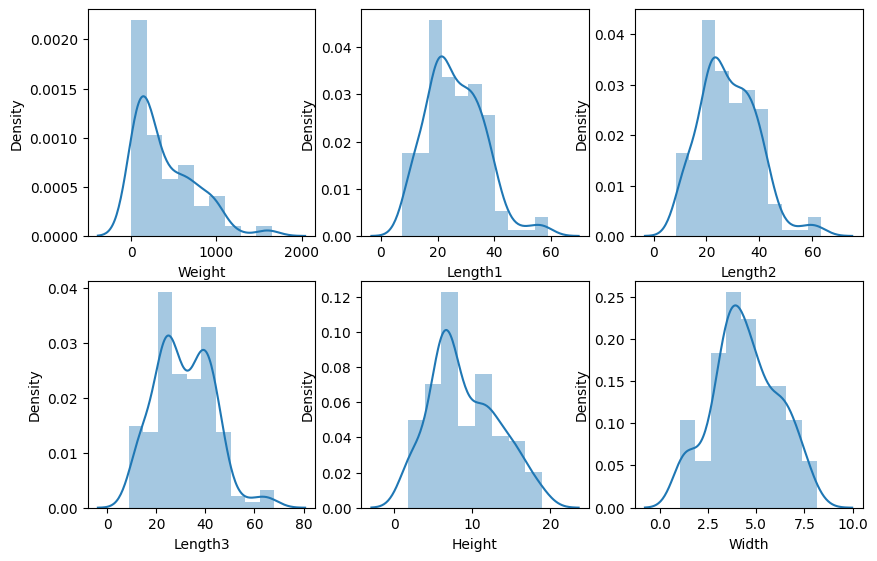

In [20]:
#univariate data anlysis
plt.figure(figsize=(10,10))
num=1
for col in data.drop("Species",axis=1):
    if num<=6:
        plt.subplot(3,3,num)
        sns.distplot(x=data[col])
        plt.xlabel(col)
    num+=1

<Axes: xlabel='Species', ylabel='count'>

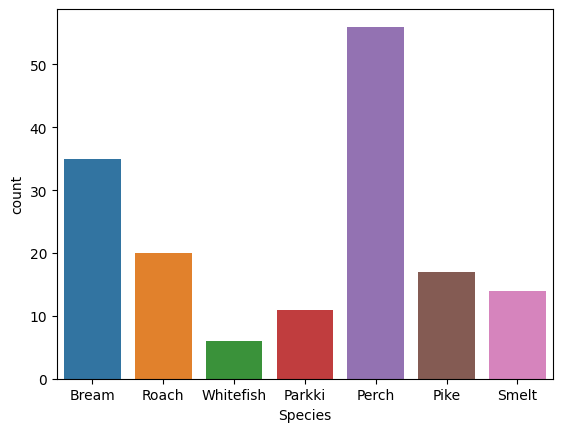

In [41]:
sns.countplot(x=data["Species"])

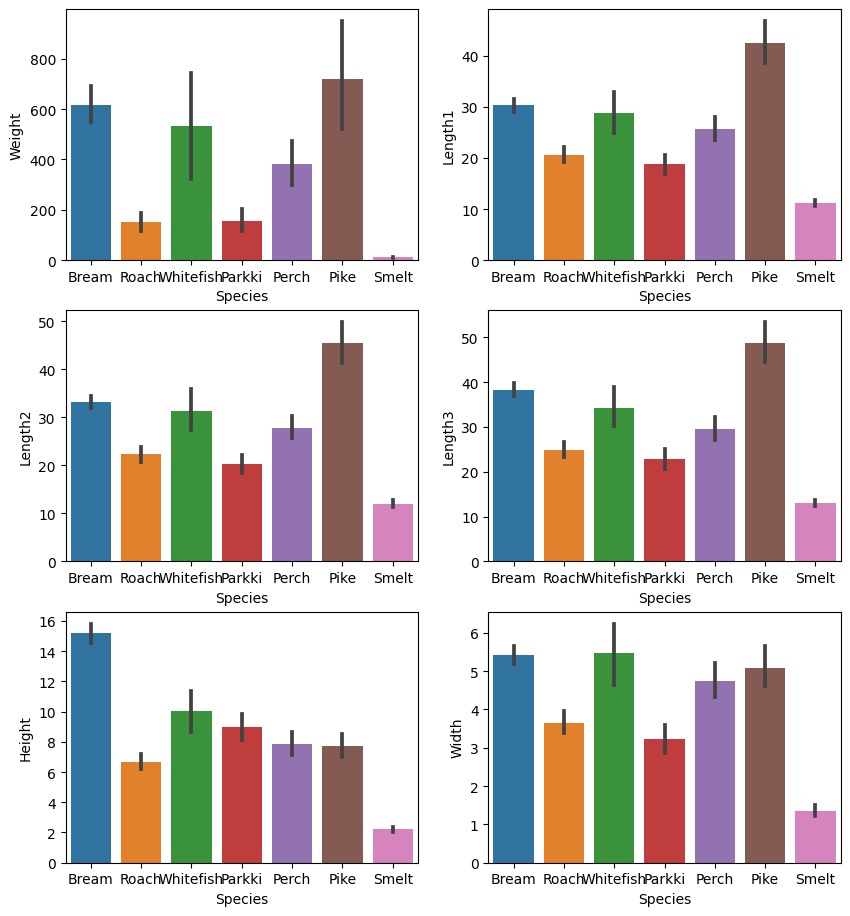

In [32]:
# bivariate anlysis

plt.figure(figsize=(10,15))
num=1
for col in data.drop("Species",axis=1):
    if num<=6:
        plt.subplot(4,2,num)
        sns.barplot(x=data["Species"],y=data[col])
        plt.xlabel("Species")
        plt.ylabel(col)

    num+=1


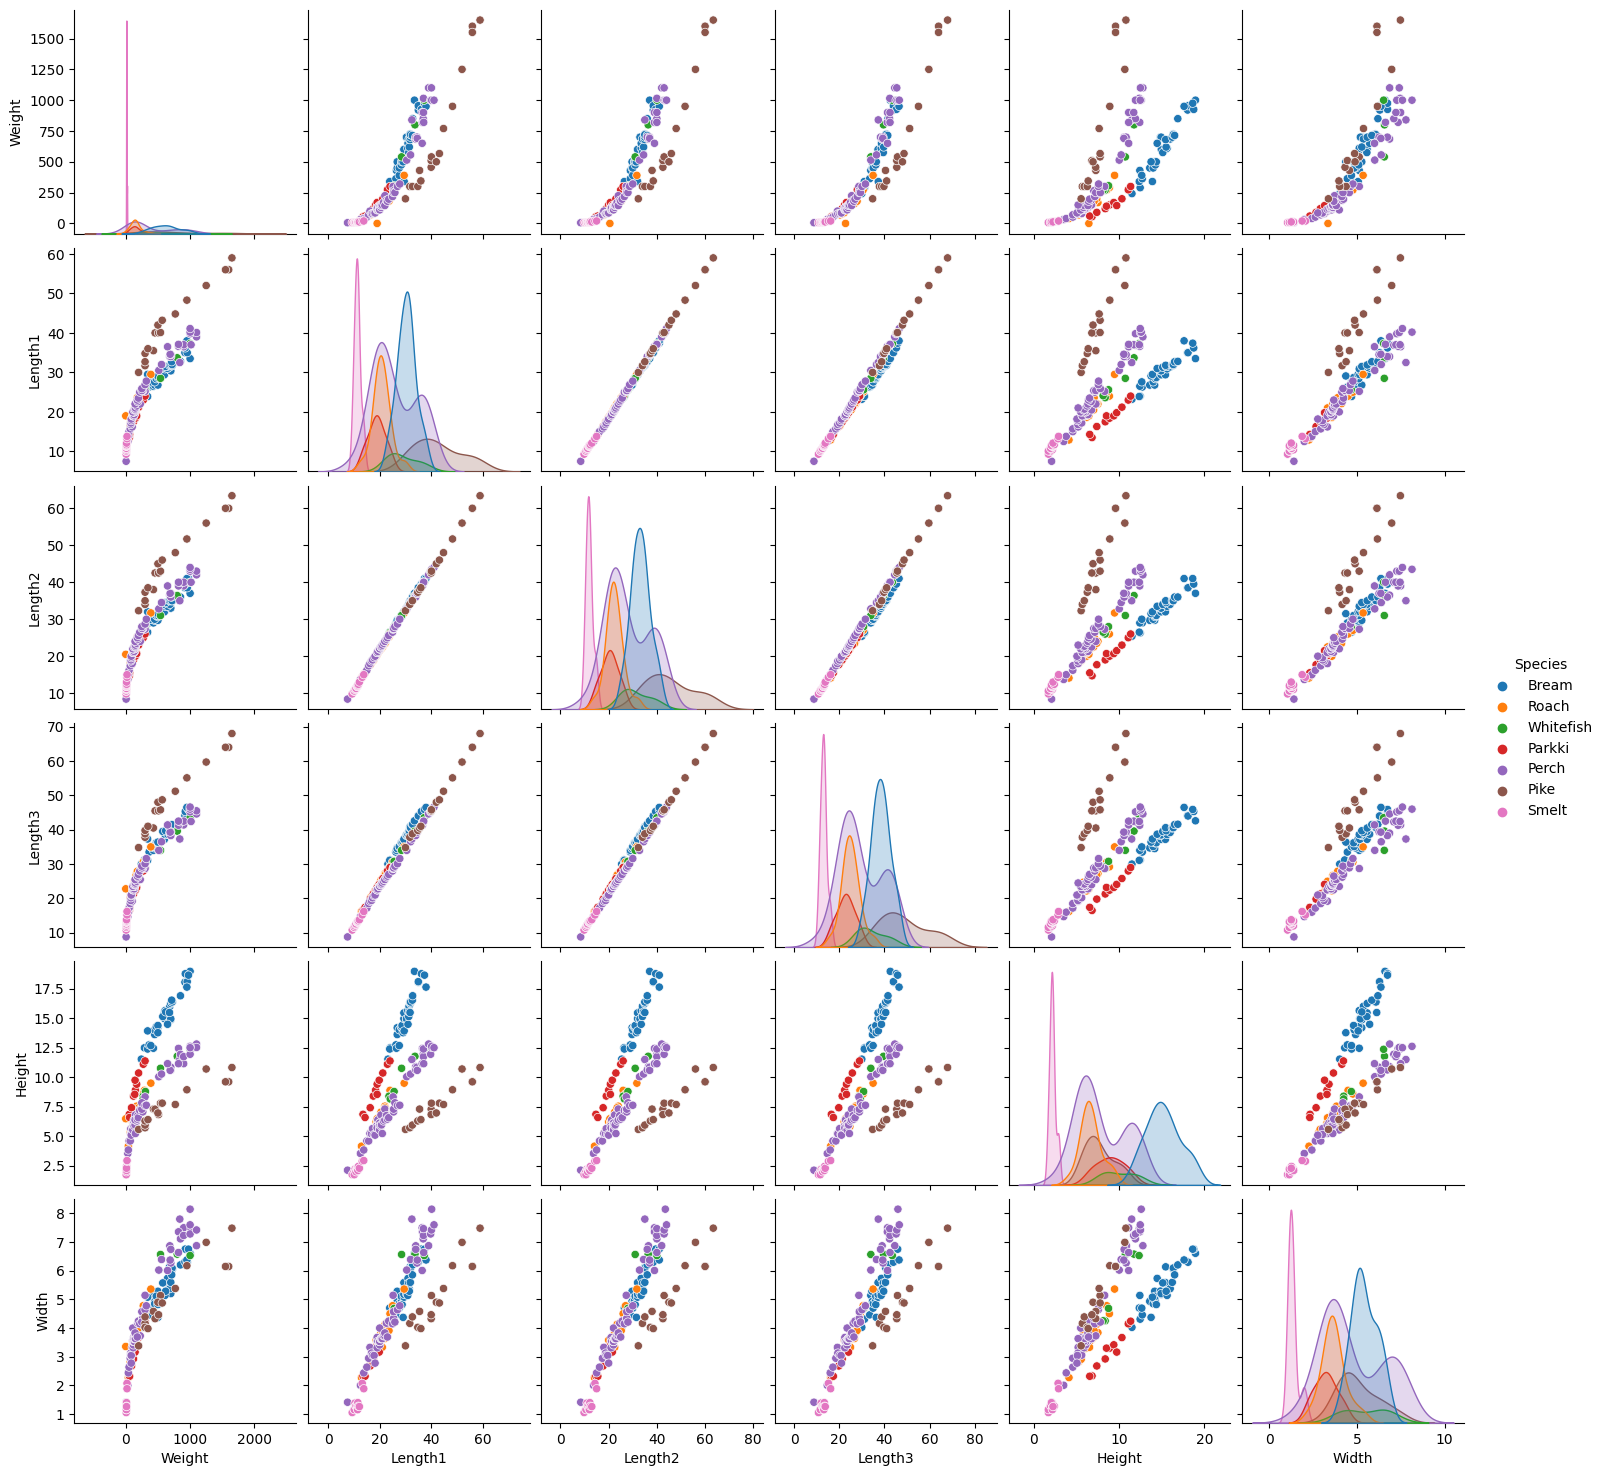

In [33]:
# multivariate
sns.pairplot(data=data,hue="Species")

# Data Preprocessing

In [34]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [36]:
data.duplicated().sum()

0

# check outliers

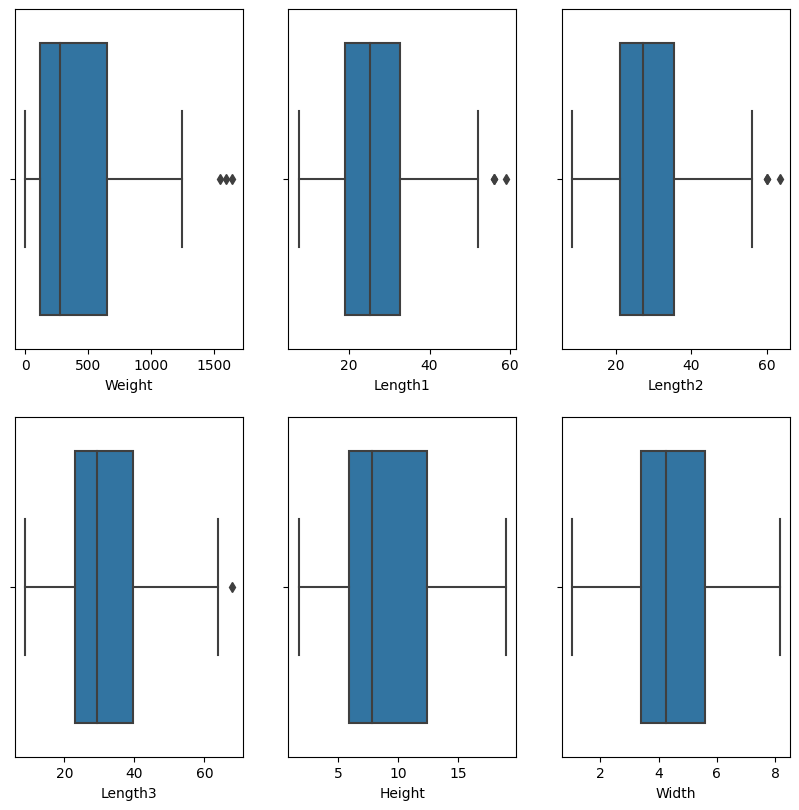

In [47]:
plt.figure(figsize=(10,15))
num=1
for col in data.drop("Species",axis=1):
    if num<=9:
        plt.subplot(3,3,num)
        sns.boxplot(x=data[col])
        plt.xlabel(col)
    num+=1

In [51]:
outliers=["Weight","Length1","Length2","Length3"]
for i in outliers:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    print("********")
    print("column name",i)
    print("IQR",IQR)
    print("lower",lower)
    print("upper",upper)
    per=len(data.loc[(data[i]<lower)|(data[i]>upper)])/len(data) 
    print("percentage of outliers", per)
    print("**** The End *****")

********
column name Weight
IQR 530.0
lower -675.0
upper 1445.0
percentage of outliers 0.018867924528301886
**** The End *****
********
column name Length1
IQR 13.650000000000002
lower -1.4250000000000007
upper 53.175000000000004
percentage of outliers 0.018867924528301886
**** The End *****
********
column name Length2
IQR 14.5
lower -0.75
upper 57.25
percentage of outliers 0.018867924528301886
**** The End *****
********
column name Length3
IQR 16.500000000000007
lower -1.600000000000012
upper 64.40000000000002
percentage of outliers 0.006289308176100629
**** The End *****
